In [2]:
'''
Part 1: Implementation of Quantum Reservoir Computing (QRC) algorithm to address credit risk modeling using the dataset.
Imporing the necessary libraries

Methodology:

1. Data Preprocessing
    i. Data Cleaning
    ii. Data Transformation
    iii. Data Normalization
    iv. Data Splitting
    v. Data Balancing
    
2. Feature Engineering
    i. Feature Extraction
    ii. Feature Construction
    iii. Feature Scaling
    
3. Quantum Reservoir Computing
    
4. Model Training
5. Model Evaluation

'''

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, recall_score
import plotly.express as px

In [3]:
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

In [4]:
data = pd.read_csv(file_path, sep=' ', header=None, engine='python')

In [5]:
column_names = [
        'Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history', 'Purpose',
        'Credit_amount', 'Savings_account', 'Present_employment_since', 'Installment_rate',
        'Personal_status_and_sex', 'Other_debtors', 'Present_residence_since', 'Property',
        'Age_in_years', 'Other_installment_plans', 'Housing', 'Number_of_existing_credits',
        'Job', 'Number_of_people_liable', 'Telephone', 'Foreign_worker', 'Target'
]

In [6]:
data.columns = column_names

In [7]:
data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate,Personal_status_and_sex,Other_debtors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits,Job,Number_of_people_liable,Telephone,Foreign_worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
X = data.drop('Target', axis=1)
y = data['Target']

In [9]:
categorial_attributes = X.select_dtypes(include=['object']).columns
categorial_attributes

Index(['Status_of_existing_checking_account', 'Credit_history', 'Purpose',
       'Savings_account', 'Present_employment_since',
       'Personal_status_and_sex', 'Other_debtors', 'Property',
       'Other_installment_plans', 'Housing', 'Job', 'Telephone',
       'Foreign_worker'],
      dtype='object')

In [10]:
'''
Encoding the categorial attributes using one-hot encoding
'''
encodeed_X = pd.get_dummies(X, columns=categorial_attributes)

In [11]:
encodeed_X.head()

,Duration_in_month,Credit_amount,Installment_rate,Present_residence_since,Age_in_years,Number_of_existing_credits,Number_of_people_liable,Status_of_existing_checking_account_A11,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_worker_A201,Foreign_worker_A202
0,6,1169,4,4,67,2,1,True,False,False,...,True,False,False,False,True,False,False,True,True,False
1,48,5951,2,2,22,1,1,False,True,False,...,True,False,False,False,True,False,True,False,True,False
2,12,2096,2,3,49,1,2,False,False,False,...,True,False,False,True,False,False,True,False,True,False
3,42,7882,2,4,45,1,2,True,False,False,...,False,True,False,False,True,False,True,False,True,False
4,24,4870,3,4,53,2,2,True,False,False,...,False,True,False,False,True,False,True,False,True,False


In [12]:
'''
Standardizing the features using standard scaler
'''
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(encodeed_X)

In [13]:
X_poly

array([[6.000e+00, 1.169e+03, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.800e+01, 5.951e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.200e+01, 2.096e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.200e+01, 8.040e+02, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.500e+01, 1.845e+03, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.500e+01, 4.576e+03, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [14]:
scaler = StandardScaler()
transformed_X = scaler.fit_transform(X_poly)

In [15]:
'''
Coverting the target variable to binary 0 and 1, 
Before,

Good: 1
Bad: 2

Now,

Good: 1
Bad: 0
'''
y = y.apply(lambda x: 1 if x == 1 else 0)

In [16]:
smote = SMOTE(random_state=42)

In [17]:
balanced_X, balanced_y = smote.fit_resample(transformed_X, y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_y, test_size=0.3, random_state=42)

In [19]:
'''Quantum Reservoir Computing (QRC) algorithm'''

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def quantum_reservoir(data, numof_qubits=4):
    simulator = AerSimulator()
    reservoir_output= []
    
    for sample in data:
        qc = QuantumCircuit(numof_qubits)
        
        norm = np.linalg.norm(sample)
        encoded_sample = sample/norm if norm != 0 else sample
        
        for i, value in enumerate(encoded_sample[:numof_qubits]):
            qc.initialize([np.sqrt(1 - value**2), value], i)
        
        for i in range(numof_qubits):
            qc.h(i)
        qc.barrier()
        for i in range(numof_qubits - 1):
            qc.cx(i, i+1)
        qc.barrier()
        
        
        qc.save_statevector()
        result = simulator.run(qc).result()
        statevector = result.get_statevector()
        reservoir_output.append(np.real(statevector.data[:2**numof_qubits]))
    
    return np.array(reservoir_output)

In [20]:
X_train_qrc = quantum_reservoir(X_train)
X_test_qrc = quantum_reservoir(X_test)

In [21]:
'''
Training the readouts (here XGBoost) model using the QRC output
'''
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_qrc, y_train)

c:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:23:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [22]:
'''
Can be used to evaluate the different model for further ensemble learning. but for now we are using only XGBoost model.
'''
models = {'XGBoost': xgb_model}
for name, model in models.items():
        y_pred = model.predict(X_test_qrc)
        y_prob = model.predict_proba(X_test_qrc)[:, 1] if hasattr(model, "predict_proba") else None
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy}")
        print(f"Recall: {recall}")
        print(f"ROC AUC: {roc_auc}")
        print(classification_report(y_test, y_pred))
        print("\n")

Model: XGBoost
Accuracy: 0.6761904761904762
Recall: 0.7064220183486238
ROC AUC: 0.7413252793169226
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       202
           1       0.68      0.71      0.69       218

    accuracy                           0.68       420
   macro avg       0.68      0.67      0.68       420
weighted avg       0.68      0.68      0.68       420





In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred)

confusion_matrix.index = ["Bad Risk", "Good Risk"]
confusion_matrix.columns = ["Bad Risk", "Good Risk"]

# Create a heatmap of the confusion matrix
fig = px.imshow(confusion_matrix.values, 
                labels=dict(x="Predicted", y="Actual", color="Count"),
                x=confusion_matrix.columns,
                y=confusion_matrix.index,
                text_auto=True)

fig.update_layout(title="Confusion Matrix Heatmap")
fig.show()

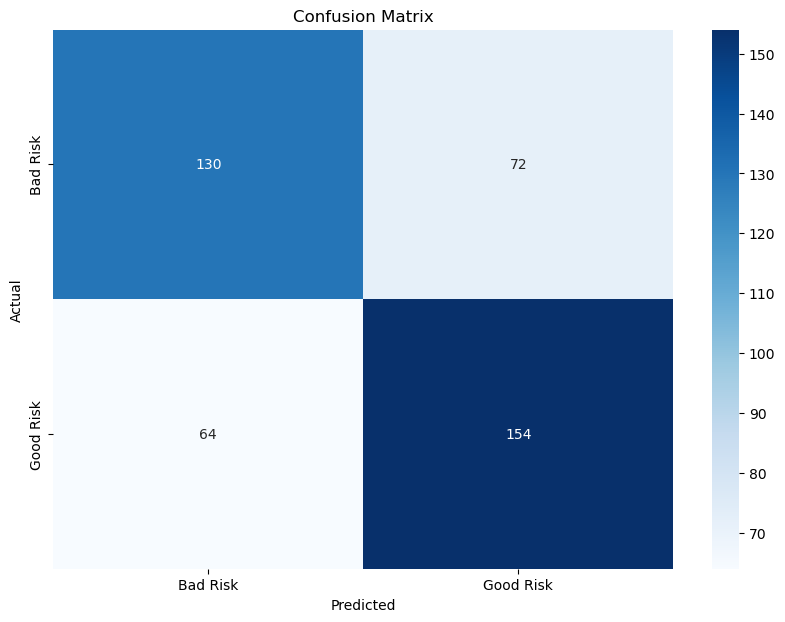

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Bad Risk", "Good Risk"], yticklabels=["Bad Risk", "Good Risk"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
cov_matrix = np.cov(X_train_qrc, rowvar=False)
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
    z=cov_matrix,
    x=[f'Feature {i}' for i in range(cov_matrix.shape[1])],
    y=[f'Feature {i}' for i in range(cov_matrix.shape[0])],
    colorscale='Viridis'))

fig.update_layout(title='Covariance Matrix Heatmap', xaxis_nticks=36)

fig.show()


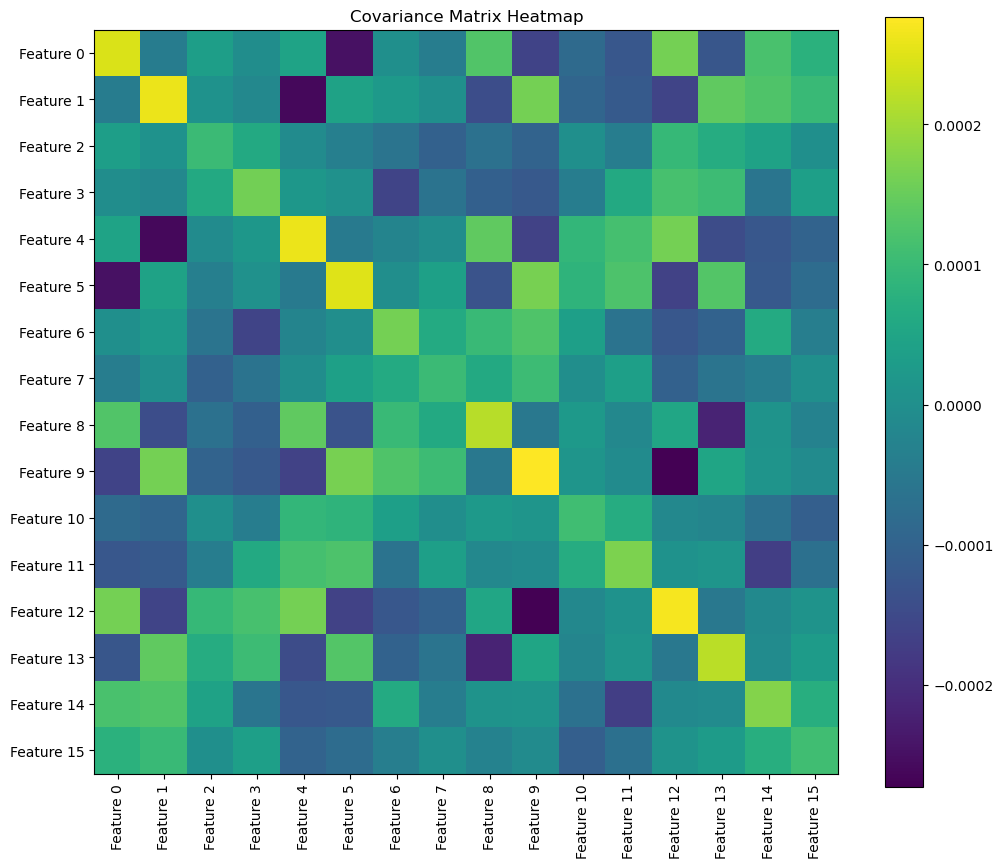

In [26]:
'''Covariance matrix'''

plt.figure(figsize=(12, 10))
plt.imshow(cov_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Covariance Matrix Heatmap')
plt.xticks(ticks=np.arange(cov_matrix.shape[1]), labels=[f'Feature {i}' for i in range(cov_matrix.shape[1])], rotation=90)
plt.yticks(ticks=np.arange(cov_matrix.shape[0]), labels=[f'Feature {i}' for i in range(cov_matrix.shape[0])])
plt.show()